In [2]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
df = pd.read_csv("D:\\Python_data_project\\1_basics\\data_jobs.csv")
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_US=df[df['job_country']=='United States'].copy()

In [5]:
df_skills=df_US.explode('job_skills')

In [6]:
df_skills.dropna(subset='job_skills',inplace=True)

In [7]:
df_skills[['job_title','job_skills']]

,job_title,job_skills
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,aws
...,...,...
785692,Data Scientist- Hybrid Work Location,matlab
785692,Data Scientist- Hybrid Work Location,r
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [8]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()

In [9]:
df_skills_count=df_skills_count.reset_index(name='skill_count')

In [10]:
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

In [11]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [12]:
job_titles=['Data Analyst','Data Engineer','Data Scientist']

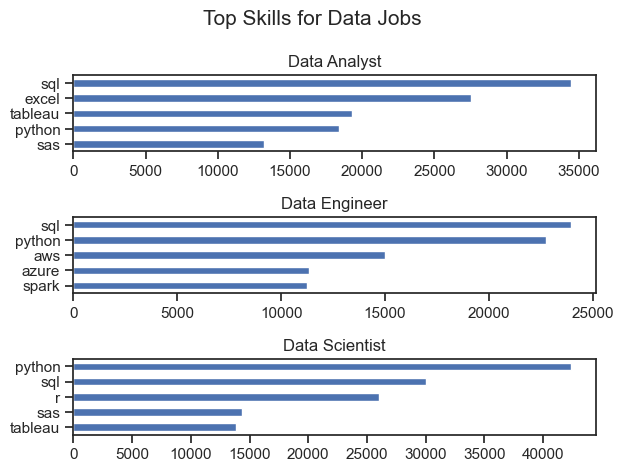

In [22]:
fig, ax=plt.subplots(3,1)
for i,job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title,legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
fig.suptitle('Top Skills for Data Jobs',fontsize=15)
fig.tight_layout()

In [14]:
df_job_title_count=df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [15]:
df_skills_perc=pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')

In [16]:
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [17]:
df_skills_perc['skill_percent']=100* df_skills_perc['skill_count']/df_skills_perc['jobs_total']

In [18]:
df_skills_perc.sort_values(by='skill_percent',ascending=False,inplace=True)

In [19]:
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
19,python,Senior Data Scientist,9816,12946,75.822648
29,python,Senior Data Engineer,6692,9289,72.042200
0,python,Data Scientist,42379,58830,72.036376
30,sql,Senior Data Engineer,6651,9289,71.600818
269,python,Machine Learning Engineer,644,921,69.923996
...,...,...,...,...,...
1738,xamarin,Data Analyst,1,67816,0.001475
1806,gtx,Data Analyst,1,67816,0.001475
1812,qt,Data Analyst,1,67816,0.001475
1725,openstack,Data Analyst,1,67816,0.001475


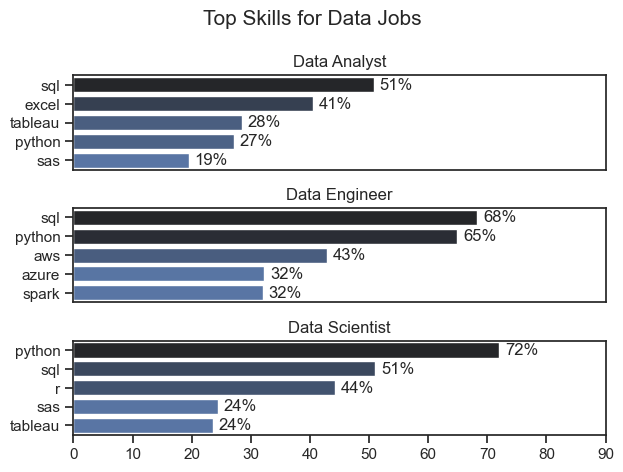

In [28]:
sns.set_theme(style='ticks')
fig, ax=plt.subplots(3,1)
for i,job_title in enumerate(job_titles):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    #df_plot.plot(kind='barh',x='job_skills',y='skill_percent',ax=ax[i],title=job_title,legend=False)
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b_r',legend=False)
    #ax[i].invert_yaxis()
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,90)
    for index,value in enumerate(df_plot['skill_percent']):
        ax[i].text(value+1,index,f'{value:.0f}%',va='center')
    if i!=len(job_titles)-1:
        ax[i].set_xticks([])

  
fig.suptitle('Top Skills for Data Jobs',fontsize=15)
fig.tight_layout()
plt.show()